In [11]:
%run Functions.py

## Introduction 

Hello! This notebook will teach you how to read in Roman spectra and fit curves to emission lines 

First let's read in some spectra 

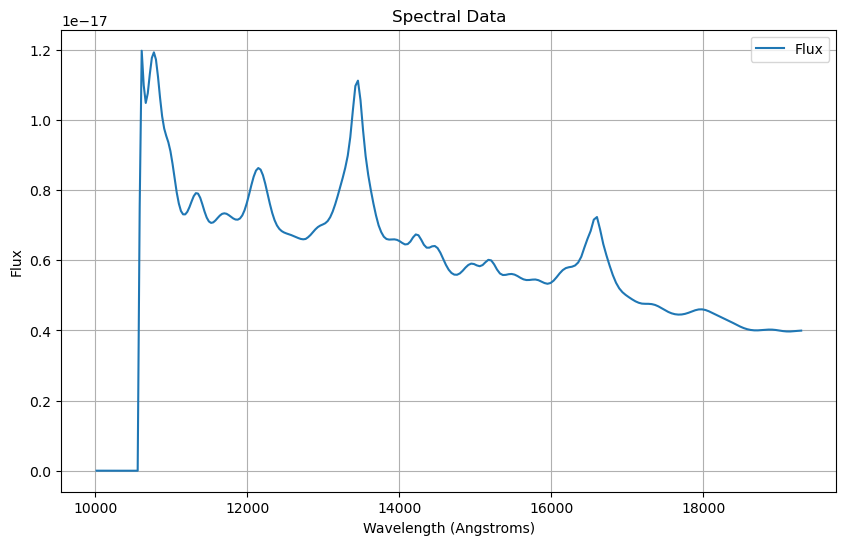

In [13]:
# Define the filename
filename = '/Users/slkumar/Downloads/QSO_sed.hdf5'

# Open the HDF5 file in read mode
with h5py.File(filename, 'r') as hdf:
    # Access the group
    data_group = hdf['Spectra']
    
    # Retrieve the datasets
    wavelength = data_group['wavelength_original'][:]
    flux = data_group['flux_original'][:]
    
    # Optionally, access attributes
    description = data_group.attrs.get('description', 'No description available.')
    created_by = hdf.attrs.get('created_by', 'Unknown')
    
    # print("Description:", description)
    # print("Created by:", created_by)
    # print("Wavelength Data:", wavelength)
    # print("Flux Data:", flux)
   
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, flux, label='Flux')
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux')
    plt.title('Spectral Data')
    plt.legend()
    plt.grid(True)
    plt.show()

Below is an example of what it looks like to fit a curve to a CIII emission line

[ 1.86817440e-19  2.27978682e-19  7.66019434e-19 -4.01035213e+02
  1.11816257e+03  4.36166864e-19  9.41432459e-19  6.39980437e-19
  1.69226601e+03  2.43792597e+03 -3.84968001e-18  1.24019790e-17]


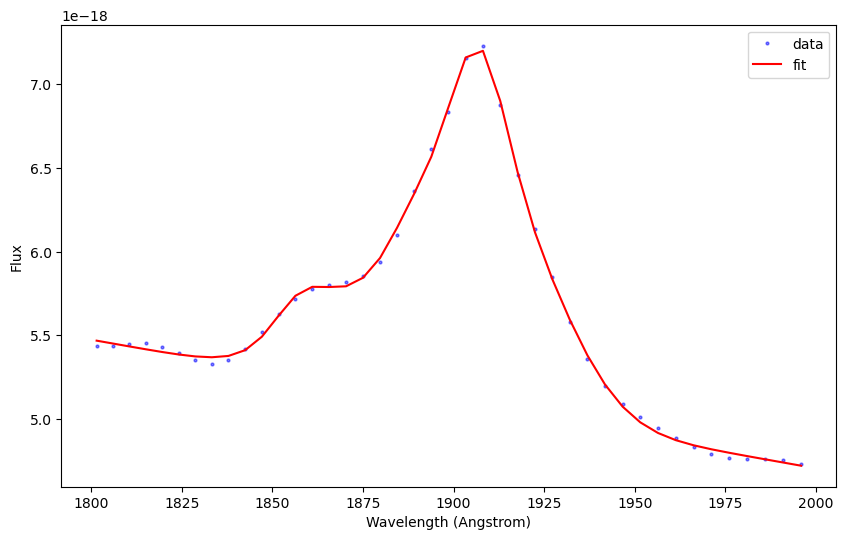

CIII BLR flux 3.899582970938542e-33


In [15]:
wavelength = wavelength / 8.7
select_CIII=(wavelength>1800)&(wavelength<2000)

y=flux[select_CIII]
x=wavelength[select_CIII]

initial_guess = [0.2,0.2,0.2,10,100,0.7,0.7,0.7,100,1000,-0.01, 0.1]

# Fit the model to the data
popt, pcov = curve_fit(CIII_model, x, y, p0=initial_guess,maxfev=10000000)

# Get the fit parameters
amp_AlIII_core,amp_SiIII_core,amp_CIII_core,vel_core,vel_sigma_core,amp_AlIII_blr,amp_SiIII_blr,amp_CIII_blr,vel_blr,vel_sigma_blr,m,c = popt

# Print the fit parameters
print(popt)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data',alpha=0.5,ms=2)
plt.plot(x, CIII_model(x, *popt), 'r-', label='fit')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.legend()
plt.show()

sigma_CIII_eff=line_width(vel_sigma_blr,rest_line=1909,inst_res_fwhm=2.4)
flux_CIII_blr=amp_CIII_blr*(np.sqrt(2.*np.pi)*np.fabs(sigma_CIII_eff))*1e-16


sigma_CIII_core_eff=line_width(vel_sigma_core,rest_line=1909,inst_res_fwhm=2.4)
flux_CIII_core=amp_CIII_core*(np.sqrt(2.*np.pi)*np.fabs(sigma_CIII_core_eff))*1e-16
#MgII_flux_z5_5=flux_MgII_blr*scaling_factors[9][1]
print('CIII BLR flux',flux_CIII_blr+flux_CIII_core)

# Exercise 

Below try to make a curve fit for CIV (the wavelength range is 1400 - 1600 Angstroms)

Will have four sections: gism (x2) and prism (x2) 

Roman data will be in sdf file 

each section will have five examples 

user will have to identify what type of object the spectra comes from 

Prism is for supernova light curve so must include that 

need package of data to read in 

25-50 objects needed to simulate 

Data challenge end goal: for each object user will give information on spectral type and temp (for star), how old (for supernova), redshift (extragalactic)
 - will create google form maybe? 

Use spectutils (astropy) for fitting spectra

to get started with demo spectra use symphotic spectra (astropy package?)

Create GitHub to upload spectra 